# Se hace la comparación entre los distintos modelos de distribución radial polinómica $a x^{p} + b$
El expontente $p$ viene dado por $p = \frac{a}{porcent - b} -1$ por lo que no está definido para $b=porcent$, y además por su construcción $a=0$ implica una integración logaritmica. He usado el hecho de que $a=0 \Leftrightarrow b=percent$ lo cual hace que computacionalmente la probabilidad se mantenga constante

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

C:\Users\guill\AppData\Local\Temp\ipykernel_20132\1658195823.py:8: RuntimeWarning: divide by zero encountered in reciprocal
  pol = aa*pow(x,aa/(0.27-bb)-1)+bb
C:\Users\guill\AppData\Local\Temp\ipykernel_20132\1658195823.py:8: RuntimeWarning: invalid value encountered in multiply
  pol = aa*pow(x,aa/(0.27-bb)-1)+bb


Text(0, 0.5, 'Fracción de átomos de interés')

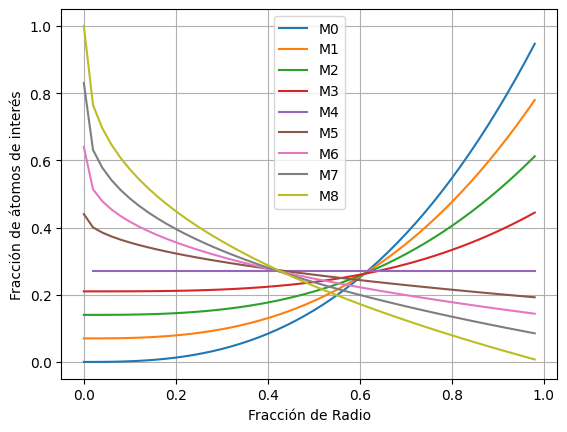

In [4]:
a = [1,0.75,0.5,0.25,0.0,-0.25,-0.5,-0.75,-1]
b = [0,0.07,0.14,0.21,0.27001,0.44,0.64,0.83,1]
fig, ax = plt.subplots()
for i in range(0,9):
    aa = a[i]
    bb = b[i]
    x = np.arange(0,1,0.02)
    pol = aa*pow(x,aa/(0.27-bb)-1)+bb
    ax.plot(x,pol,label=f'M{i}')

ax.legend()
ax.grid()
ax.set_xlabel('Fracción de Radio')
ax.set_ylabel('Fracción de átomos de interés')

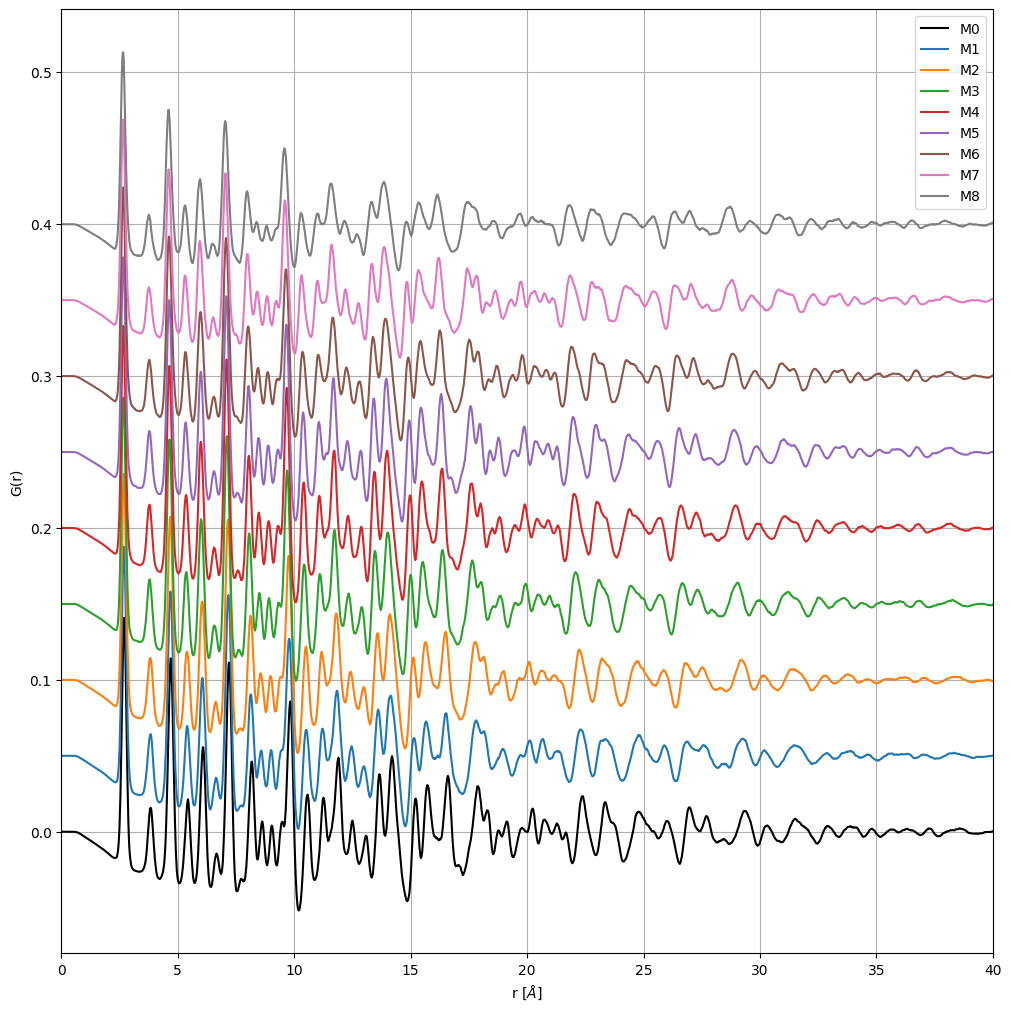

In [3]:
M0 = pd.read_csv('M0/M0-polrad_0_d2.txt', sep='\s+')
M1 = pd.read_csv('M1/M0-polrad_1_d2.txt', sep='\s+')
M2 = pd.read_csv('M2/M0-polrad_2_d2.txt', sep='\s+')
M3 = pd.read_csv('M3/M0-polrad_3_d2.txt', sep='\s+')
M4 = pd.read_csv('M4/M0-polrad_4_d2.txt', sep='\s+')
M5 = pd.read_csv('M5/M0-polrad_5_d2.txt', sep='\s+')
M6 = pd.read_csv('M6/M0-polrad_6_d2.txt', sep='\s+')
M7 = pd.read_csv('M7/M0-polrad_7_d2.txt', sep='\s+')
M8 = pd.read_csv('M8/M0-polrad_8_d2.txt', sep='\s+')

fig, ax = plt.subplots(figsize=(10,10), layout='constrained' )

x = 0.05

ax.plot(M0['#r(A)'],M0['G(r)']+0*x, color='black', label='M0')
ax.plot(M1['#r(A)'],M1['G(r)']+1*x, label='M1')
ax.plot(M2['#r(A)'],M2['G(r)']+2*x, label='M2')
ax.plot(M3['#r(A)'],M3['G(r)']+3*x, label='M3')
ax.plot(M4['#r(A)'],M4['G(r)']+4*x, label='M4')
ax.plot(M5['#r(A)'],M5['G(r)']+5*x, label='M5')
ax.plot(M6['#r(A)'],M6['G(r)']+6*x, label='M6')
ax.plot(M7['#r(A)'],M7['G(r)']+7*x, label='M7')
ax.plot(M8['#r(A)'],M8['G(r)']+8*x, label='M8')

ax.set_xlabel('r [$\\AA$]')
ax.set_xlim([0,40])
ax.set_ylabel('G(r)')

ax.legend(loc='upper right')
ax.grid()
plt.rc('font', size='12')
plt.rcParams['font.family']='serif'
plt.show()

#### Posible explicación al cambio de intensidad de los picos
Se puede ver que conforme la cantidad de Co aumenta hacia un lado u otro, entonces en ese lado los picos pierden intensidad debido al poder de difracción del cobalto. En el modelo M8 los primeros picos tienen una intensidad mucho menor al modelo M0, sin embargo el modelo M8 cuenta con picos más pronunciados en las distancias más grandes, y mientras que los picos mas alejados del modelo M0 pierden intensidad comparandolo con modelo mental. Bajo este supuesto los modelos intermedios (principalmente el M4) deberían tener los picos más intensos a las grandes distancias respecto a los otros modelos, esto se puede ver claramente en las gráficas donde aparecen las distribuciones solapadas. Tambien un factor de gran importancia de los modelos con gran concentración de cobalto hacia el centro es que el cobalto en el centro tiende a tener una dispersión generalizada sobre sus posiciones atómicas dispuestas en forma FCC, o sea que tienden a cambiar a HCP.

#### Posible explicación al cambio de posición de los picos
Ahora bien, creo que el hecho de que las distribuciones se "recorran" hacia la izquierda, tiene que ver con que una mayor concentración de cobalto hacia el centro "succiona" a la partícula hacia adentro debido a las menores distancias interatómicas presentes hacia el centro. Traté de encontrar otra explicación pero por la forma en que está construido el código del programa rdf, esta es la ÚNICA explicación QUE SE ME OCURRE, pues una mayor concentración de cobalto en el centro implica distancias interatómicas más grandes para la nanopartícula en general. El modelo M0 (maxima concentración central de Co) tiene una distancia máxima de 48.99 $\AA$ con una distancia promedio de 25.2, el M8 (máxima concentración exterior de Co) tiene una distancia máxima de 49.43 $\AA$ y 24.81 en promedio, mientras que el intermedio M4 (concentración constante y uniforme) tiene una distancia máxima de 48.78 $\AA$ y una promedio de 24.95. Ojo, como se puede ver en los datos, esto si afecta el tamaño de la nanopartícula, y un poco sus distancias interatómicas, M4 es el ejemplo perfecto de esto, la relación entre el tamaño(maximo)-concentración(Co hacia el exterior) es inversa a la distancia promedio.

Al final M0 es más grande que M8, por eso el recorrido, aunque el recorrido no se puede explicar por una diferiencia de tamaños simplemente, pues el recorrido es notablemente grande.

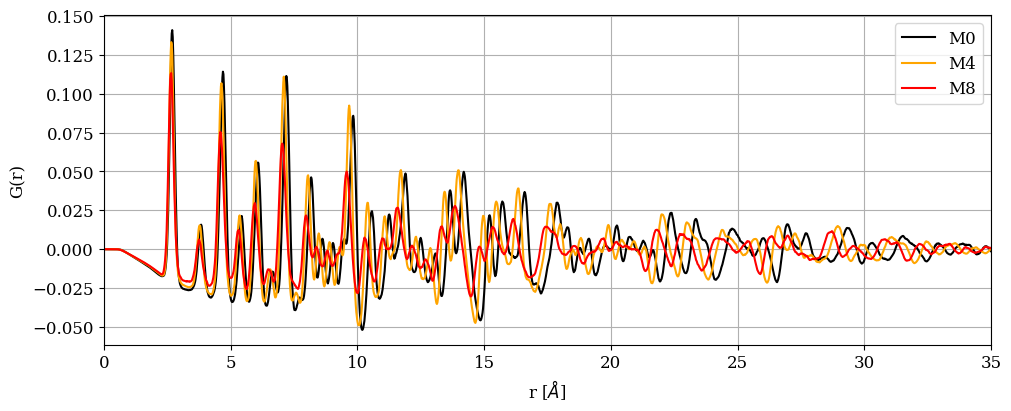

In [10]:
fig, ax = plt.subplots(figsize=(10,4), layout='constrained' )


ax.plot(M0['#r(A)'],M0['G(r)'], color='black', label='M0')
ax.plot(M4['#r(A)'],M4['G(r)'], color='orange',label='M4')
ax.plot(M8['#r(A)'],M8['G(r)'], color= 'red' ,label='M8')

ax.set_xlabel('r [$\\AA$]')
ax.set_xlim([0,35])
ax.set_ylabel('G(r)')

ax.legend(loc='upper right')
ax.grid()
plt.rc('font', size='12')
plt.rcParams['font.family']='serif'
plt.show()

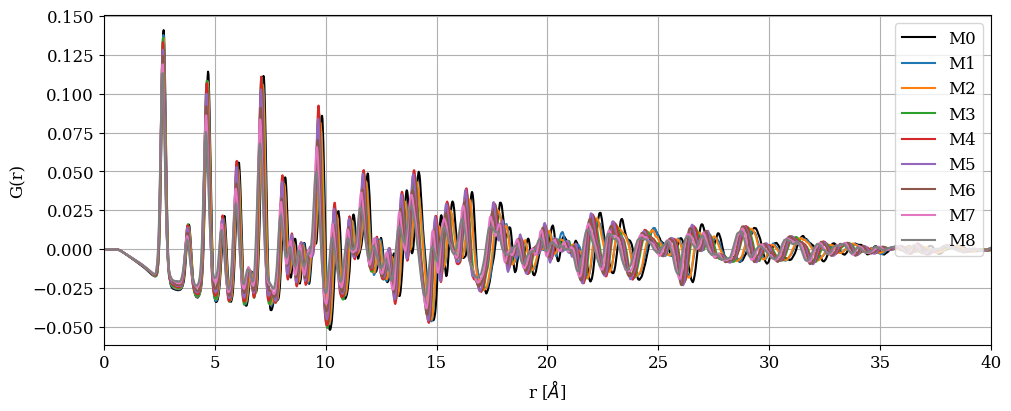

In [42]:
rfig, ax = plt.subplots(figsize=(10,4), layout='constrained' )

x = 0.0

ax.plot(M0['#r(A)'],M0['G(r)']+0*x, color='black', label='M0')
ax.plot(M1['#r(A)'],M1['G(r)']+1*x, label='M1')
ax.plot(M2['#r(A)'],M2['G(r)']+2*x, label='M2')
ax.plot(M3['#r(A)'],M3['G(r)']+3*x, label='M3')
ax.plot(M4['#r(A)'],M4['G(r)']+4*x, label='M4')
ax.plot(M5['#r(A)'],M5['G(r)']+5*x, label='M5')
ax.plot(M6['#r(A)'],M6['G(r)']+6*x, label='M6')
ax.plot(M7['#r(A)'],M7['G(r)']+7*x, label='M7')
ax.plot(M8['#r(A)'],M8['G(r)']+8*x, label='M8')

ax.set_xlabel('r [$\\AA$]')
ax.set_xlim([0,40])
ax.set_ylabel('G(r)')

ax.legend(loc='upper right')
ax.grid()
plt.rc('font', size='12')
plt.rcParams['font.family']='serif'
plt.show()

Se puede ver que el modelo con una distribución uniforme (M4) de 0.27 a lo largo de todo el radio tiene picos con más intensidad que la mayoría de los modelos intermedios entre M0 y M9, y mantiene la maxima intensidad en la mayoría de picos entre los 7.5 y los 17.5 $\AA$ de todos los modelos, se aprecia la disminución de la intensidad de picos y un shift a la izquierda conforme la distribución del cobalto aumenta hacia el centro: (Co $\rightarrow 100$ %) $\Leftrightarrow$ $(r \rightarrow 0)$ & $M_{i} \rightarrow M8$